### Sentiment140 dataset with 1.6 million tweets <br>
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment . <br>

It contains the following 6 fields: <br>

* **target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)**

* ids: The id of the tweet ( 2087)

* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

* flag: The query (lyx). If there is no query, then this value is NO_QUERY.

* user: the user that tweeted (robotickilldozr)

* text: the text of the tweet (Lyx is cool)

### Importing Required Dependencies

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM, GRU, Bidirectional
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Word2vec
import gensim


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.3.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading and exploring dataset

In [2]:
columns = ['target','ids','date','flag','user','text']

In [3]:
twitter_data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding="ISO-8859-1",header=None,names= columns)

In [4]:
twitter_data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
print("Total number of tweets are: {} ".format(len(twitter_data)))

Total number of tweets are: 1600000 


In [6]:
twitter_data.target.value_counts()

4    800000
0    800000
Name: target, dtype: int64

Dataset is equally balanced with 80k positive and 80k negative sentiment tweets

In [7]:
twitter_data.user.value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
jordanhanley         1
jasonscoggins        1
snomimons            1
leavesoflorien       1
markjz               1
Name: user, Length: 659775, dtype: int64

#### Dropping columns: <br>
Few features are not required to get the desired predictions. So we will remove them

In [8]:
data = twitter_data.drop(['ids','date','flag','user'],axis=1)

In [9]:
data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


#### Taget to sentiment

In [10]:
tar_to_sentiment = {0:'Negative',4:'Positive'}
def label_encoder(label):
    return tar_to_sentiment[label]
data.target = data.target.apply(lambda x : label_encoder(x))
data.head()

,target,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment data disctibution')

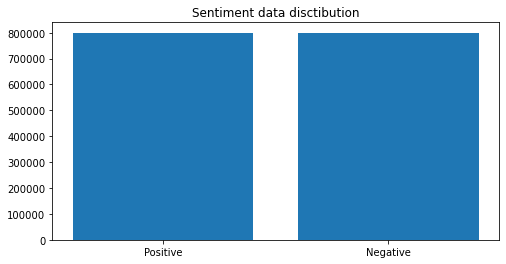

In [11]:
val_counts = data.target.value_counts()
plt.figure(figsize=(8,4))
plt.bar(val_counts.index,val_counts.values)
plt.title('Sentiment data disctibution')

## Text Preprocessing

Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods.

#### Text Preprocessing: </b>
* Stemming
* Lematization
* Removing Hyperlinks and Mentions
* Remove Stopwords

In [12]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [13]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [14]:
data.text = data.text.apply(lambda x: preprocess(x))

In [15]:
data.head()

,target,text
0,Negative,awww bummer shoulda got david carr third day
1,Negative,upset update facebook texting might cry result...
2,Negative,dived many times ball managed save 50 rest go ...
3,Negative,whole body feels itchy like fire
4,Negative,behaving mad see


### Let's see some word cloud visualizations 

In [ ]:
# !pip install wordcloud

**POSITIVE WORDS**

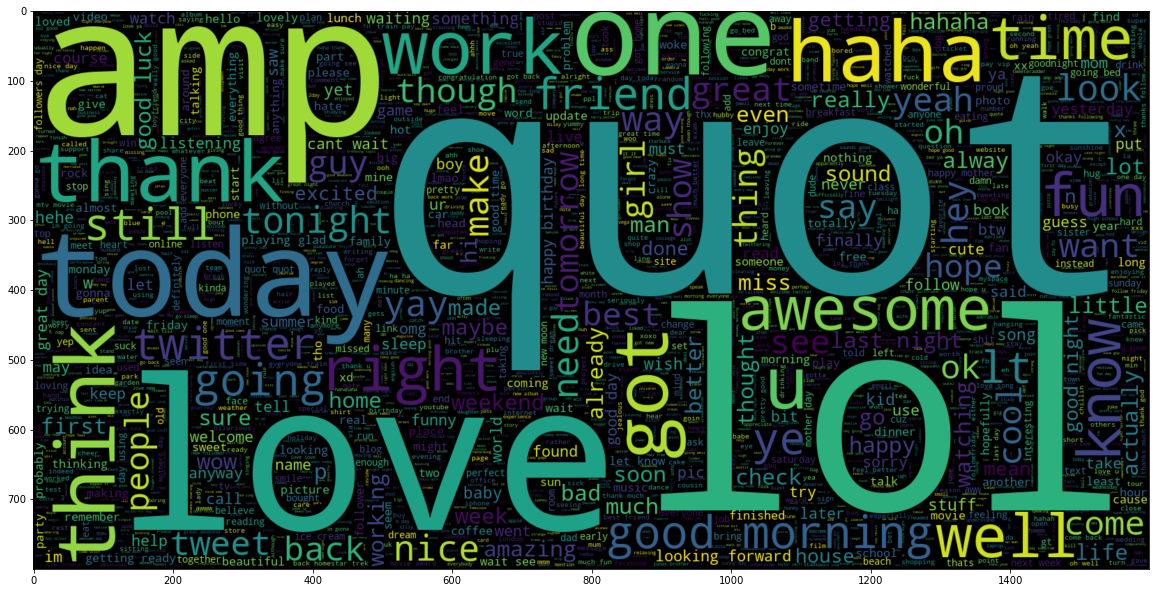

In [16]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.target == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

**NEGATIVE WORDS**

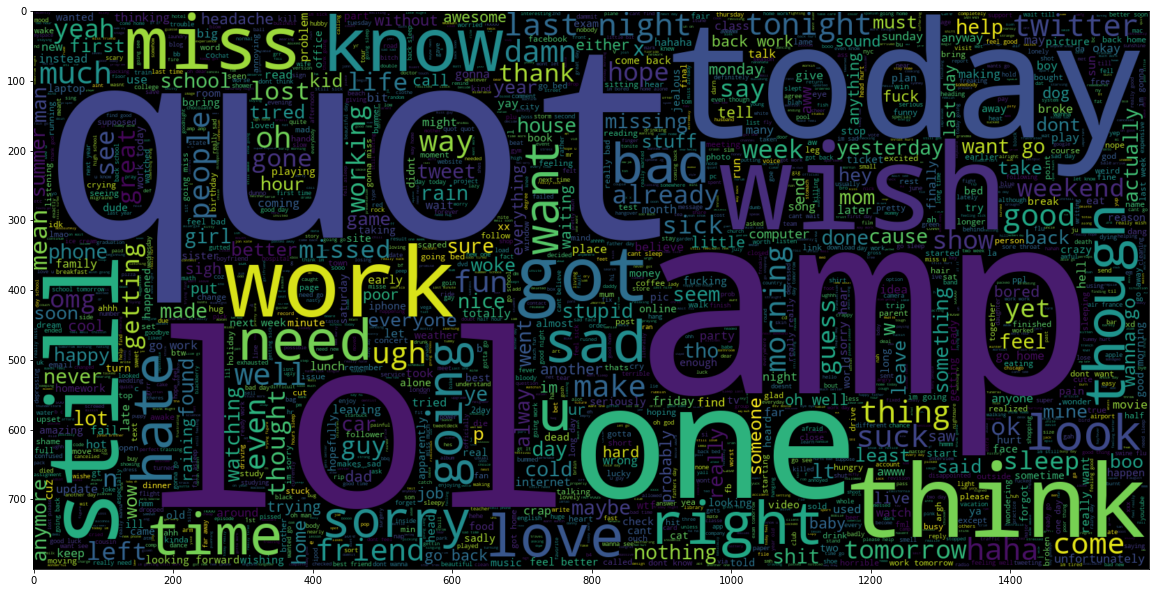

In [17]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.target == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

### Train and Test Split

In [18]:
TRAIN_SIZE = 0.8
train_data, test_data = train_test_split(data, test_size=1-TRAIN_SIZE,
                                         random_state=7)  # Splits Dataset into Training and Testing set

print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [19]:
train_data.head()

,target,text
23786,Negative,need friends
182699,Negative,im trying call impossible
476661,Negative,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,u gonna shows ny soon luv see u live
878773,Positive,hell yea get em tattoos ink free wish parents ...


In [20]:
test_data.head()

,target,text
709290,Negative,feelin lately reason
654075,Negative,ju clare elly zoe leave marbella
728623,Negative,wish couldve seen miley nick sing 2night
697650,Negative,work today 1 hour 6 go
1244425,Positive,started catch house viewing kind odd watched b...


### Word2Vec

Genism word2vec requires that a format of ‘list of lists’ for training where every document is contained in a list and every list contains lists of tokens of that document.

In [21]:
corpus = [text.split() for text in train_data.text]

In [22]:
corpus[0:2]

[['need', 'friends'], ['im', 'trying', 'call', 'impossible']]

In [47]:
# WORD2VEC 
W2V_SIZE = 500 #The number of dimensions of the embeddings and the default is 100
W2V_WINDOW = 3
W2V_EPOCH = 32
W2V_MIN_COUNT = 20

In [24]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

#### size: The number of dimensions of the embeddings and the default is 100.
#### window: The maximum distance between a target word and words around the target word. The default window is 5.
#### min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
#### workers: The number of partitions during training and the default workers is 3.
#### sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [25]:
w2v_model.build_vocab(corpus)

In [26]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 19720


In [27]:
w2v_model.train(corpus, total_examples=len(corpus), epochs=W2V_EPOCH)

(258171620, 295373376)

In [28]:
w2v_model.wv.most_similar("sad")

[('depressed', 0.5357859134674072),
 ('upset', 0.5113242864608765),
 ('bummed', 0.46816471219062805),
 ('bad', 0.41740062832832336),
 ('sadd', 0.4145081341266632),
 ('depressing', 0.3849900960922241),
 ('saad', 0.37931424379348755),
 ('disappointed', 0.3720814883708954),
 ('cry', 0.3706016540527344),
 ('bittersweet', 0.3673303723335266)]

In [29]:
w2v_model.wv.most_similar("life")

[('lifes', 0.39267101883888245),
 ('world', 0.3701360821723938),
 ('relationship', 0.31700941920280457),
 ('career', 0.311906635761261),
 ('lives', 0.3077777922153473),
 ('lifeee', 0.29493820667266846),
 ('lifee', 0.29235541820526123),
 ('situations', 0.2849532961845398),
 ('responsibility', 0.2807745933532715),
 ('relationships', 0.2799606919288635)]

In [30]:
w2v_model.wv.similarity("sad","life")

0.114247754

In [36]:
w2v_model.wv.similarity("life","death")

0.018610958

### Tokenization

<i> **tokenizer** </i> create tokens for every word in the data corpus and map them to a index using dictionary.

<i> **word_index** </i> contains the index for each word

<i> **vocab_size** </i> represents the total number of word in the data corpus

In [51]:
# KERAS
MAX_SEQUENCE_LENGTH = 30
EPOCHS = 10
BATCH_SIZE = 1024

In [38]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


Since we are going to build a sequence model. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we seek a little help from pad_sequence to do our job. It will make all the sequence in one constant length MAX_SEQUENCE_LENGTH.

In [39]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [40]:
labels = train_data.target.unique().tolist()
labels

['Negative', 'Positive']

### Label Encoding

In [41]:
encoder = LabelEncoder()

encoder.fit(train_data.target.to_list())

y_train = encoder.transform(train_data.target.to_list())
y_test = encoder.transform(test_data.target.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


### Embedding Matrix <br>
Each row of the matrix will contain a word and columns will be the embeddings of that word

In [42]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290575, 500)


### Model Building

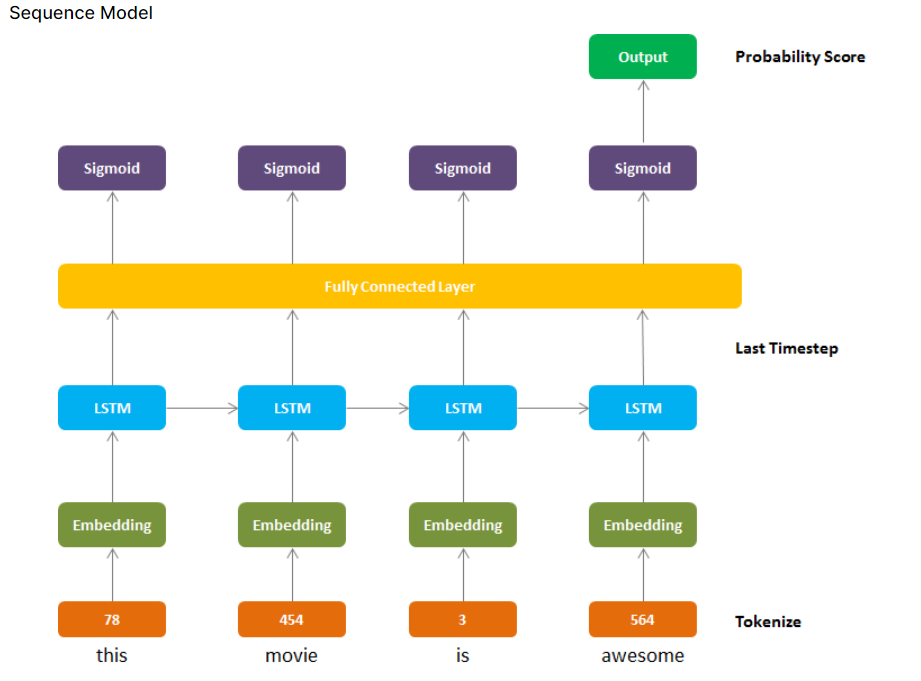

In [53]:
from IPython.display import Image
Image("RNN_Sentiment_Analysis.PNG")

In [43]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)

In [44]:
learning_rate_reduction = [ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)]

In [45]:
model = Sequential()
model.add(embedding_layer)
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 500)           145287500 
_________________________________________________________________
lstm (LSTM)                  (None, 30, 128)           322048    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 145,661,069
Trainable params: 373,569
Non-trainable params: 145,287,500
_________________________________________________________________


#### Training the model with train data and labels 

In [48]:
history = model.fit(x_train, y_train,
                    batch_size = BATCH_SIZE, 
                    validation_split=0.1,
                    epochs = 4, #EPOCHS, 
                    callbacks = learning_rate_reduction)

Epoch 1/4
1125/1125 [==============================] - 970s 863ms/step - loss: 0.4615 - accuracy: 0.7796 - val_loss: 0.4434 - val_accuracy: 0.7906
Epoch 2/4
1125/1125 [==============================] - 966s 859ms/step - loss: 0.4481 - accuracy: 0.7874 - val_loss: 0.4407 - val_accuracy: 0.7925
Epoch 3/4
1125/1125 [==============================] - 1003s 892ms/step - loss: 0.4445 - accuracy: 0.7892 - val_loss: 0.4396 - val_accuracy: 0.7925
Epoch 4/4
1125/1125 [==============================] - ETA: 0s - loss: 0.4430 - accuracy: 0.7903
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
1125/1125 [==============================] - 954s 848ms/step - loss: 0.4430 - accuracy: 0.7903 - val_loss: 0.4394 - val_accuracy: 0.7924


#### Evaluating the model on test data and labels

In [49]:
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

313/313 [==============================] - 54s 174ms/step - loss: 0.4419 - accuracy: 0.7912

ACCURACY: 0.791196882724762
LOSS: 0.4418608546257019


Now lets the check the training and validation, accuracy and loss with epocs

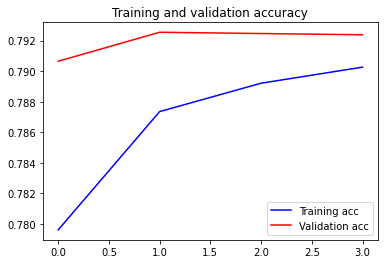

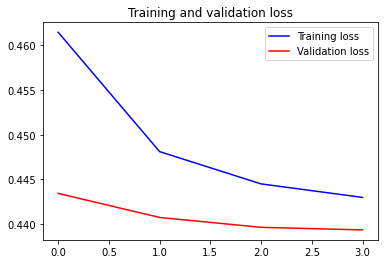

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
